In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [76]:
X, y = make_blobs(n_samples=1000, n_features=10, centers=10)

In [77]:
ohe = OneHotEncoder(categories="auto")
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hot, test_size=0.33, random_state=42)

In [79]:
def generate_model(layers_list):
    model = {}
    model["input_size"] = layers_list[0]
    model["output_size"] = layers_list[-1]
    model["layers"] = []
    
    for i in range(1, len(layers_list)):
        layer = {}
        layer["w"] = np.random.randn(layers_list[i-1], layers_list[i])
        layer["b"] = np.zeros([1, layers_list[i]])
        model["layers"].append(layer)
    
    return model

In [82]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    expo = np.exp(z)
    total = np.sum(expo, axis=1, keepdims=True)
    return expo / total

In [83]:
val = sigmoid(np.array([-4, 0, 4]))

In [84]:
val = softmax(np.array([[1, 6, 10], [2, 5, 9]]))

In [97]:
def forword(model, x_data):
    
    layers = model["layers"]
    
    a = x_data
    
    activations = []
    
    for l, layer in enumerate(layers):
        z = np.dot(a, layer["w"]) - layer["b"]
        
        if l == (len(layers)-1):
            a = softmax(z)
        else:
            a = np.tanh(z)
        
        activations.append(a)
    
    return activations
        

In [98]:
def backward(x_data, y_data, model, activations, lr = .01):
    layers = model["layers"]
    
    for l in range(len(layers) - 1, -1, -1):
        if l == len(layers) - 1:
            delta = y_data - activations[l]
        else:
            print(np.dot(delta, layers[l+1]["w"].T).shape)
            delta = np.multiply(np.dot(delta, layers[l+1]["w"].T), 1 - np.square(np.tanh(activations[l])))
        
        if l != 0:
            deltaw = np.dot(activations[l-1].T, delta)
        else:
            deltaw = np.dot(x_data.T, delta)
            
        deltab = np.sum(delta, axis=0)/delta.shape[0]
        
        layers[l]["w"] +=  deltaw * lr
        layers[l]["b"] += deltab * lr
        
        

In [120]:
m2 = generate_model([X_train.shape[1], 10, 10, y_train.shape[1]])

In [121]:
def predictions(model, x_data):
    y_ = forword(model, x_data)[-1]
    return y_

def accuracy(model, x_data, y_data):
    pred = predictions(model, x_data)
    
    return (np.argmax(pred, axis=1).reshape(-1, 1) == np.argmax(y_data, axis=1).reshape(-1, 1)).mean()

def main(model, x_seq, y_seq, epochs=20, batch_size=30):
    for i in range(epochs):
        index = 0
        while index < x_seq.shape[0]:
            x_for = x_seq[index:index + batch_size]
            y_for = y_seq[index:index + batch_size]
            act = forword(model, x_for)
            backward(x_for, y_for, model, act)
            index = index + batch_size
        print("done with epochs : ", i)
        print(accuracy(model, x_seq, y_seq))
# act = forword(m2, X_train)
# backward(X_train, y_train, m2, act)


In [122]:
main(m2, X_train, y_train, batch_size=200)

(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(70, 10)
(70, 10)
done with epochs :  0
0.7761194029850746
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(70, 10)
(70, 10)
done with epochs :  1
0.8955223880597015
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(70, 10)
(70, 10)
done with epochs :  2
0.9567164179104478
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(70, 10)
(70, 10)
done with epochs :  3
0.9611940298507463
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(70, 10)
(70, 10)
done with epochs :  4
0.991044776119403
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(70, 10)
(70, 10)
done with epochs :  5
0.9925373134328358
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(70, 10)
(70, 10)
done with epochs :  6
0.991044776119403
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(70, 10)
(70, 10)
done with epochs :  7
0.9940298507462687
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)


In [103]:
print(np.argmax(predictions(m2, X_train[:10]), axis=1))
print(np.argmax(y_train[:10], axis=1))

[2 5 2 9 7 7 7 8 1 5]
[[2]
 [5]
 [2]
 [9]
 [8]
 [7]
 [7]
 [8]
 [1]
 [5]]


In [124]:
accuracy(m2, X_train, y_train)

1.0

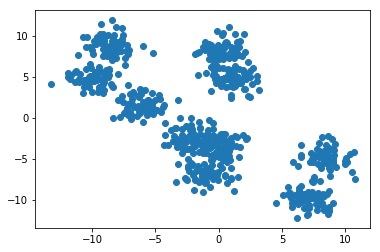

In [112]:
plt.scatter(X_train[:, 0], X_train[:, 1])

In [123]:
accuracy(m2, X_test, y_test)

0.990909090909091